In [54]:
import os 
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns


## Functions needed

def pos_xy_to_angle(x, y):
    deg = np.degrees(np.arctan2(y,x))
    if deg<0:
        deg=360-abs(deg)
    
    deg=int(deg)
    return deg



def RFangle_2_octaves(angle):
    ## round RF to octave
    value = min([0, 45, 90, 135, 180, 225, 270, 315, 360], key=lambda x:abs(x-angle))
    
    if value==360:
        value=0
    
    return value


RFangle_2_octaves(329)    

def angle_from_RF(loc_angle, RF_angle):
    ## change from position of target to angle taking into account the RF
    angle_target = RFangle_2_octaves(RF_angle)
    angle_dist = angle_target + 45*loc_angle
    if angle_dist>=360:
        angle_dist=angle_dist-360
    
    if loc_angle==99:
        angle_dist=np.nan
    
    return angle_dist


# x_rf=f['data']['info'][0][0][0][1][0][25][0][0]
# y_rf=f['data']['info'][0][0][0][1][0][26][0][0]

# RF_angle = pos_xy_to_angle(x_rf, y_rf)
# RF_loc = RFangle_2_octaves(RF_angle)


# Dist_loc = angle_from_RF(99, RF_loc)

# print(RF_angle, RF_loc, Dist_loc)
def RFangle_2_octaves(angle):
    ## round RF to octave
    value = min([0, 45, 90, 135, 180, 225, 270, 315, 360], key=lambda x:abs(x-angle))
    
    if value==360:
        value=0
    
    return value


def circdist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)

    


Number of neurons = 104
Speriatus 0
189139306.mat
Trials keep = 416
Trials excluded = 212


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

Speriatus 1
1891406.mat
Trials keep = 508
Trials excluded = 18
Speriatus 2
1891407.mat
Trials keep = 472
Trials excluded = 86
Speriatus 3
189141804.mat
Trials keep = 307
Trials excluded = 43
Speriatus 4
1891421.mat
Trials keep = 507
Trials excluded = 27
Speriatus 5
1891436.mat
Trials keep = 477
Trials excluded = 89
Speriatus 6
189144701.mat
Trials keep = 505
Trials excluded = 33
Speriatus 7
189144904.mat
Trials keep = 485
Trials excluded = 51
Speriatus 8
189147105.mat
Trials keep = 461
Trials excluded = 111
Speriatus 9
189150602.mat
Trials keep = 471
Trials excluded = 91
Speriatus 10
189151102.mat
Trials keep = 472
Trials excluded = 12
Speriatus 11
189152601.mat
Trials keep = 465
Trials excluded = 43
Speriatus 12
189154404.mat
Trials keep = 479
Trials excluded = 17
Speriatus 13
189154602.mat
Trials keep = 482
Trials excluded = 33
Speriatus 14
189155501.mat
Trials keep = 498
Trials excluded = 172
Speriatus 15
189156205.mat
Trials keep = 482
Trials excluded = 66
Speriatus 16
189157901.ma

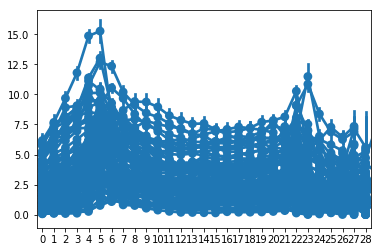

In [55]:
os.getcwd()
#path='C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\data files\\distractor paper data only\\Mojo'

for monkey_directory in ['Speriatus', 'Mojo']:
    path = 'C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\data files\\distractor paper data only\\' +monkey_directory
    #path='C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\data files\\distractor paper data only\\'+monkey_directory
    os.chdir(path)
    Monkey = path.split('\\')[-1]
    print('Number of neurons = ' + str(len(os.listdir())))

    for file_to_use in range(0, len(os.listdir()) ):  #
        os.chdir(path)
        print(  monkey_directory + ' ' + str(file_to_use))
        file_numb=file_to_use
        file = os.listdir()[file_numb]
        print(file)
        # import file into a dictionary
        f = scipy.io.loadmat(file)
        #
        ## Get the RF features
        x_rf=f['data']['info'][0][0][0][1][0][25][0][0]
        y_rf=f['data']['info'][0][0][0][1][0][26][0][0]
        RF_angle = pos_xy_to_angle(x_rf, y_rf)
        RF_loc = RFangle_2_octaves(RF_angle)

        np.shape(f['data']['spikes'][0][0][0])

        #Continue if data

        if np.shape(f['data']['spikes'][0][0][0]) ==(0,):
            print('No data')
            #break()

        else:        
            #Spikes times
            df_spike_time=pd.DataFrame(f['data']['spikes'][0][0][0][0][:, :])
            np.shape(df_spike_time)
            df_spike_time.iloc[:, 0]
            df_spike_time.columns = [str(i) for i in range(0, np.shape(df_spike_time)[1])]


            ### Events
            Dict_events={}

            for i in range(0, len(f['data']['events'][0][0][0])     ):
                events = pd.DataFrame( f['data']['events'][0][0][0][i])
                events.columns=['time', 'code']
                Dict_events[str(i)]= events


            ### Descriptors & Bad trials
            ## Use the Descriptors to take the booleans to use
            lists=[]
            for T in range(0, len(f['data']['descriptors'][0][0][0])):
                lists.append( [f['data']['descriptors'][0][0][0][T][i][0] for i in range(len(f['data']['descriptors'][0][0][0][T]) )] )



            #
            Descriptors = pd.DataFrame(lists)
            Descriptors=Descriptors.transpose()
            Descriptors.columns = [str(i) for i in range(0, np.shape(Descriptors)[1])]

            ## 26 descriptot for each trial
            # 6 = 1 for success, 14== antisacade, 15==othersacade
            boolean_success_trials = Descriptors.iloc[6].isin([1, 14, 15]) #Descriptors.iloc[6,:]==1

            # 24  0, 1, 2 for target in RF 
            #boolean_TinRF_trials = Descriptors.iloc[24].isin([0,1,2])

            ##Use the bad to take the booleans of bad trials
            #Bad trials
            bad = pd.DataFrame(np.array([f['data']['bad'][0][0][0][x][0][0] for x in range(0, len(f['data']['bad'][0][0][0]))]))
            bad = bad.transpose()
            bad.columns = [str(i) for i in range(0, np.shape(df_spike_time)[1])]

            #print(shape(bad))
            #each column in a trial; if 1, discard it
            boolean_correct_trials = bad.iloc[0,:]!=1



            #Boolean combinging success trials and correct
            boolean_keep = boolean_success_trials & boolean_correct_trials 
            print('Trials keep = ' +str(sum(boolean_keep)))
            print('Trials excluded = ' + str(np.shape(df_spike_time)[1] - sum(boolean_keep) ))

            #df_spikes_correct
            indexes_trials_keep = np.array([str(i) for i in range(0, np.shape(df_spike_time)[1])])[boolean_keep]
            df_spikes = df_spike_time[list(indexes_trials_keep)]
            df_spikes = df_spikes.iloc[4:, :]
            #take off columns full of nans (after the first 4, the rest was nan)
            df_spikes = df_spikes.transpose()[df_spikes.iloc[0,:]<9999].transpose() 



            #
            ### Convert the df_spikes to count_spikes
            def count_spikes(data, start=0, wind=100):
                max_value = int(data[data<9999].max())
                windows = np.arange(start, max_value, wind)

                counts=[]

                for idx, w in enumerate(list(windows)[:-1]):
                    counts.append(sum((data>w) & (data<windows[idx+1])))

                return counts


            ## Not all the trials are equally long. Windows starting at the target onset
            number_count=[]
            for TRIAL in list(df_spikes.columns):
                try:
                    target_onset = Dict_events[TRIAL].loc[Dict_events[TRIAL]['code']==6, 'time'].values[0]
                except IndexError:
                    try:
                        target_onset = Dict_events[TRIAL].loc[Dict_events[TRIAL]['code']==7, 'time'].values[0] -100
                    except IndexError:
                        pass

                ####
                spike_count_column = count_spikes(df_spikes[TRIAL],start=target_onset-400, wind=100)
                #### you need to have the max len for the next matrix
                number_count.append(len(spike_count_column))



            ### Dataframe with the spike count in the windows 
            df_count = pd.DataFrame(np.nan, index=list(range(0, max(number_count))) , columns=list(df_spikes.columns))

            for TRIAL in list(df_spikes.columns):    
                try:
                    target_onset = Dict_events[TRIAL].loc[Dict_events[TRIAL]['code']==6, 'time'].values[0]
                    spike_count_column = count_spikes(df_spikes[TRIAL], start=target_onset -400, wind=100)
                    df_count[TRIAL].iloc[0:len(spike_count_column)] = spike_count_column
                except IndexError:
                    try:
                        target_onset = Dict_events[TRIAL].loc[Dict_events[TRIAL]['code']==7, 'time'].values[0] -100
                        spike_count_column = count_spikes(df_spikes[TRIAL], start=target_onset-400, wind=100)
                        df_count[TRIAL].iloc[0:len(spike_count_column)] = spike_count_column
                    except IndexError:
                        pass


                ####
                #spike_count_column = count_spikes(df_spikes[TRIAL], start=target_onset, wind=100)
                #df_count[TRIAL].iloc[0:len(spike_count_column)] = spike_count_column


            #df_count


            #Profile of a neuron rate (mean for window)
            Matrix =df_count.transpose()
            #Matrix
            sns.pointplot(data=Matrix)


            #(trials, times)
            #np.shape(Matrix)

            os.chdir('C:\\Users\\David\\Desktop\\IDIBAPS\\Gottlib_data\\David_fixation')

            #Dictionary to save
            Matrix_events={}
            name_dict = file.split('.')[0]

            TRIALS = {}
            for i in list(Matrix.index):
                TRIALS[i] = Dict_events[i]

            Matrix_events['data'] = Matrix
            Matrix_events['monkey'] = Monkey
            Matrix_events['trials'] =TRIALS
            #### Descriptors
            Descriptors_use = Descriptors[list(Matrix_events['trials'].keys())]
            Targets_locations = Descriptors_use.loc[1].values
            Targets_loc = [angle_from_RF(t, RF_loc) for t in Targets_locations]
            Descriptors_use.loc[26]=RF_angle #### the specific RF angle (0, 360 of the target)
            Descriptors_use.loc[27]=RF_loc  ##### the RF loc of the target (0, 45, 90, 135...)
            Descriptors_use.loc[28]=Targets_loc  ### the real angle of the target (0,45,90.....)

            Distractors_locations = Descriptors_use.loc[19].values
            Distractors_loc = [angle_from_RF(d, RF_loc) for d in Distractors_locations]
            Descriptors_use.loc[29]=Distractors_loc #### the real angle of the distractor (0, 45, 90...)


            Centered_target = [circdist(Descriptors_use.loc[27][i], Descriptors_use.loc[28][i]) for i in range(0, len(Descriptors_use.loc[28]))]
            Descriptors_use.loc[30]=Centered_target

            target_180_180 = Descriptors_use.loc[28] - Descriptors_use.loc[27]
            for n in range(0, len(target_180_180)):
                if target_180_180[n] >180:
                    target_180_180[n]= target_180_180[n]-360


            Descriptors_use.loc[31]=target_180_180

            real_target_loc = Descriptors_use.loc[27] + Descriptors_use.loc[31]

            ##### real_target_loc
            for i in range(0, len(real_target_loc)):
                if real_target_loc[i]<0:
                    real_target_loc[i] = 360 + real_target_loc[i]


            Descriptors_use.loc[32] = real_target_loc
            ###
            Matrix_events['Descriptor'] =Descriptors_use
            
            ####
            #### Normalized firing rate
            #Trials_norm_FR = Matrix_events['Descriptor'].columns[(Matrix_events['Descriptor'].loc[20]==0) & (Matrix_events['Descriptor'].loc[24]==0)] ## distractors of 0ms
            Trials_norm_FR = Matrix_events['Descriptor'].columns[Matrix_events['Descriptor'].loc[19]==99] ##the no distractors
            FR_cont = Matrix_events['data'].loc[Trials_norm_FR]
            max_fr = FR_cont.max().max()
            Matrix_events['data_norm'] = Matrix_events['data']/max_fr

            ### Save
            np.save( name_dict + '.npy', Matrix_events) 





